In [21]:
import pandas as pd

In [6]:
data = pd.read_csv('hollywood_movies.csv')

In [7]:
data

,Movie,LeadStudio,RottenTomatoes,AudienceScore,Story,Genre,TheatersOpenWeek,OpeningWeekend,BOAvgOpenWeekend,DomesticGross,ForeignGross,WorldGross,Budget,Profitability,OpenProfit,Year
0,Spider-Man 3,Sony,61.0,54.0,Metamorphosis,Action,4252.0,151.10,35540.0,336.53,554.34,890.87,258.0,345.30,58.57,2007
1,Shrek the Third,Paramount,42.0,57.0,Quest,Animation,4122.0,121.60,29507.0,322.72,476.24,798.96,160.0,499.35,76.00,2007
2,Transformers,Paramount,57.0,89.0,Monster Force,Action,4011.0,70.50,17577.0,319.25,390.46,709.71,150.0,473.14,47.00,2007
3,Pirates of the Caribbean: At World's End,Disney,45.0,74.0,Rescue,Action,4362.0,114.70,26302.0,309.42,654.00,963.42,300.0,321.14,38.23,2007
4,Harry Potter and the Order of the Phoenix,Warner Bros,78.0,82.0,Quest,Adventure,4285.0,77.10,17998.0,292.00,647.88,939.89,150.0,626.59,51.40,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,What's Your Number,Fox,24.0,50.0,Transformation,Comedy,3002.0,5.42,1806.0,14.01,16.42,30.43,20.0,152.13,27.10,2011
593,Winnie The Pooh,Disney,91.0,79.0,Quest,Animation,2405.0,7.86,3267.0,26.69,6.46,33.15,30.0,110.51,26.20,2011
594,X-Men: First Class,Disney,87.0,88.0,Monster Force,Action,3641.0,55.10,15134.0,146.41,207.22,353.62,160.0,221.01,34.44,2011
595,Your Highness,Universal,26.0,36.0,Comedy,Comedy,2769.0,9.36,3380.0,21.60,3.26,24.86,49.9,49.81,18.76,2011


In [8]:
data.isnull().sum()

Movie               0
LeadStudio          0
RottenTomatoes      0
AudienceScore       0
Story               0
Genre               0
TheatersOpenWeek    0
OpeningWeekend      0
BOAvgOpenWeekend    0
DomesticGross       0
ForeignGross        0
WorldGross          0
Budget              0
Profitability       0
OpenProfit          0
Year                0
dtype: int64

In [9]:
# Select columns with data types float or int
numeric_df = data.select_dtypes(include=['float64', 'int64'])

# Display the DataFrame with only numeric columns
print(numeric_df)

     RottenTomatoes  AudienceScore  TheatersOpenWeek  OpeningWeekend  \
0              61.0           54.0            4252.0          151.10   
1              42.0           57.0            4122.0          121.60   
2              57.0           89.0            4011.0           70.50   
3              45.0           74.0            4362.0          114.70   
4              78.0           82.0            4285.0           77.10   
..              ...            ...               ...             ...   
592            24.0           50.0            3002.0            5.42   
593            91.0           79.0            2405.0            7.86   
594            87.0           88.0            3641.0           55.10   
595            26.0           36.0            2769.0            9.36   
596            14.0           42.0            3482.0           20.07   

     BOAvgOpenWeekend  DomesticGross  ForeignGross  WorldGross  Budget  \
0             35540.0         336.53        554.34      890.8

In [20]:
# Install seaborn library in Jupyter
import piplite
await piplite.install('seaborn')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

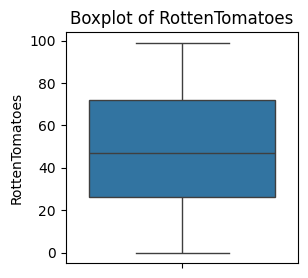

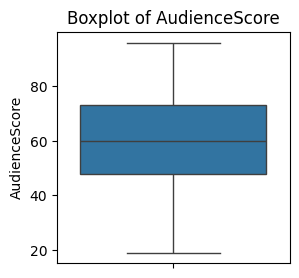

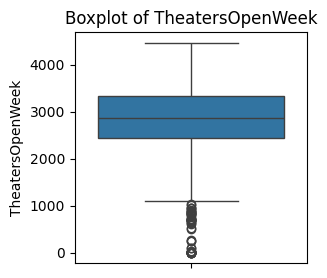

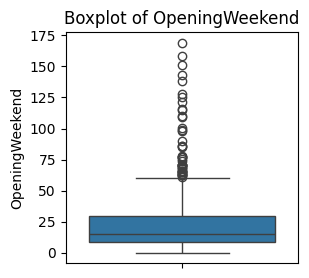

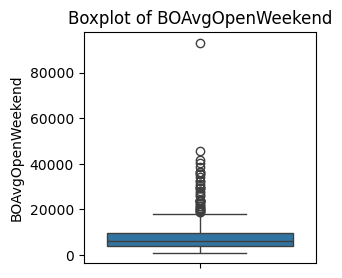

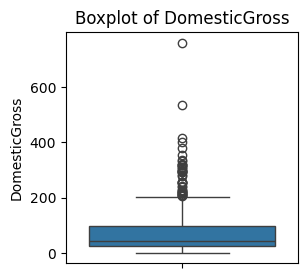

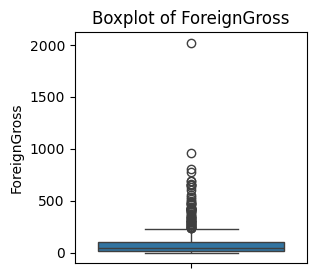

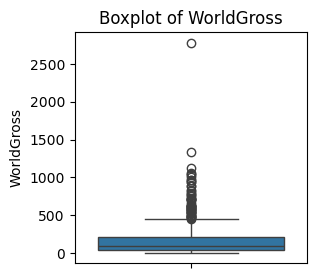

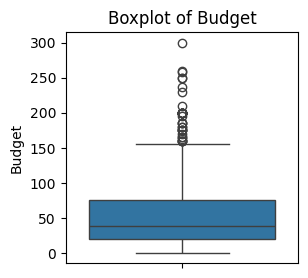

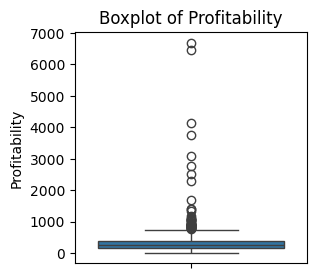

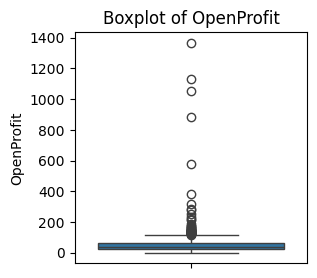

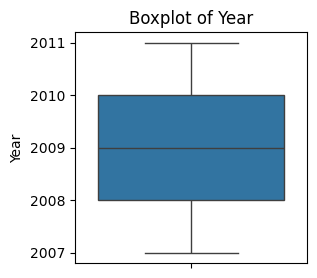

In [11]:
# List all columns
columns = numeric_df.columns

# Create a box plot for each numeric column
for column in columns:
    if numeric_df[column].dtype in ['float64', 'int64']:  # Check if the column is numeric
        plt.figure(figsize=(3, 3))  # Set figure size
        sns.boxplot(y=numeric_df[column])  # Plot a box plot for the numeric column
        plt.title(f'Boxplot of {column}')  # Set the title of the plot
        plt.show()  # Display the plot

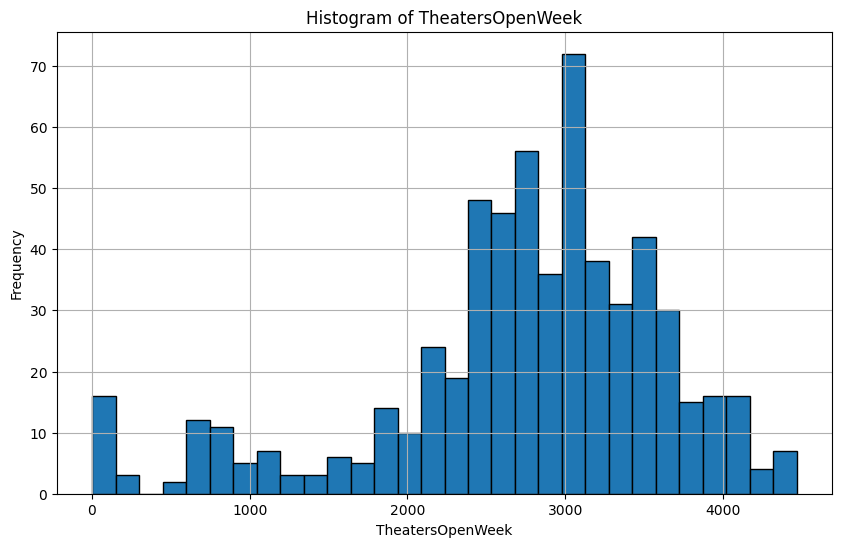

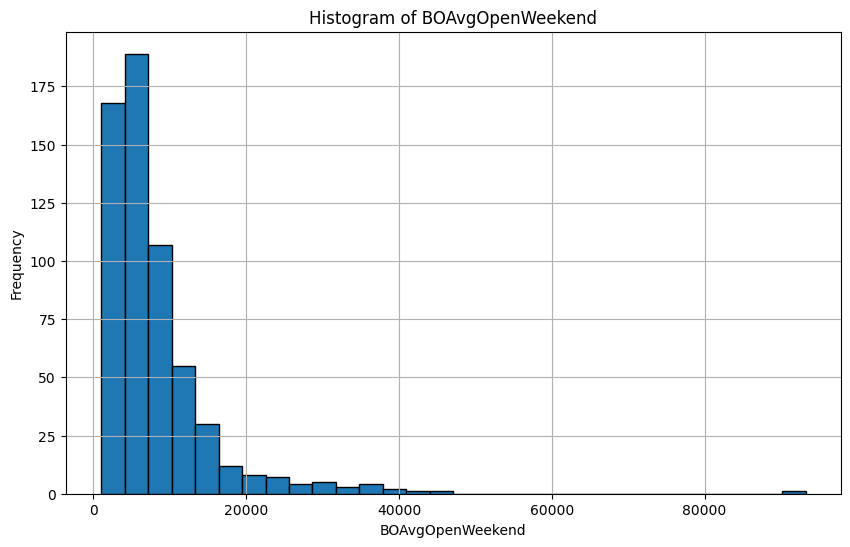

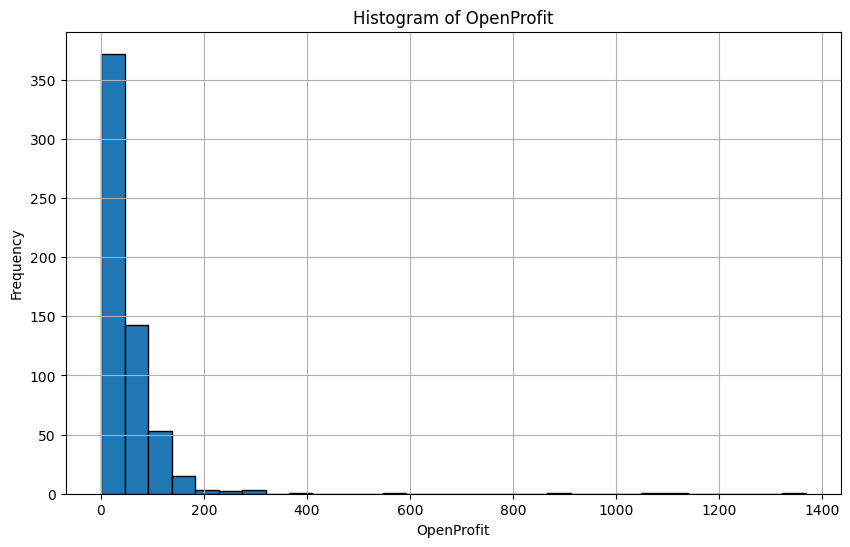

In [22]:
# Plot the histograms
plt.figure(figsize=(10, 6))
plt.hist(numeric_df['TheatersOpenWeek'], bins=30, edgecolor='black')
plt.title('Histogram of TheatersOpenWeek')
plt.xlabel('TheatersOpenWeek')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(numeric_df['BOAvgOpenWeekend'], bins=30, edgecolor='black')
plt.title('Histogram of BOAvgOpenWeekend')
plt.xlabel('BOAvgOpenWeekend')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(numeric_df['OpenProfit'], bins=30, edgecolor='black')
plt.title('Histogram of OpenProfit')
plt.xlabel('OpenProfit')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [26]:
# Calculate the mean and median for the 'age' column
mean_age = numeric_df['BOAvgOpenWeekend'].mean()
median_age = numeric_df['BOAvgOpenWeekend'].median()

print("Mean of BOAvgOpenWeekend column:", mean_age)
print("Median of BOAvgOpenWeekend column:", median_age)

# We see there's a difference so we have skewed sample.

Mean of BOAvgOpenWeekend column: 8054.177554438861
Median of BOAvgOpenWeekend column: 5977.0


In [47]:
# Outliers for skewed data!
import numpy as np
from scipy import stats  # Make sure to import stats from scipy

def detect_outliers_log_transformed(column):
    # Ensure the column is numeric
    if not pd.api.types.is_numeric_dtype(column):
        raise ValueError("The column must be numeric.")
    
    # Apply log transformation (add a small constant to avoid log(0) issues)
    transformed_column = np.log(column + 1e-6)
    
    # Calculate the z-scores of the transformed column
    z_scores = stats.zscore(transformed_column)
    
    # Define a threshold for what you consider to be an outlier
    threshold = 3
    
    # Identify outliers
    outliers = column[abs(z_scores) > threshold]
    
    return outliers

# Assuming you have already read the CSV file into numeric_df
# Extract the specific column (replace 'your_column_name' with the actual column name)
column_data_1 = numeric_df['BOAvgOpenWeekend']

# Detect outliers in the extracted column using log transformation
outliers_1 = detect_outliers_log_transformed(column_data_1)
print(outliers_1)

584    93230.0
Name: BOAvgOpenWeekend, dtype: float64


In [49]:
column_data_2 = numeric_df['OpenProfit']

# Detect outliers in the extracted column using log transformation
outliers_2 = detect_outliers_log_transformed(column_data_2)
print(outliers_2)

164    1368.00
321       0.93
342       0.62
352       1.73
366       0.53
436       0.60
438       0.34
455    1133.33
521     884.67
540    1051.40
562       0.52
584       1.16
Name: OpenProfit, dtype: float64


In [50]:
column_data_3 = numeric_df['TheatersOpenWeek']

# Detect outliers in the extracted column using log transformation
outliers_3 = detect_outliers_log_transformed(column_data_3)
print(outliers_3)

168     36.0
205      9.0
321      4.0
342      4.0
344      6.0
352      9.0
361     11.0
366      2.0
371      4.0
436      4.0
438      6.0
490      5.0
562     22.0
565    106.0
584      4.0
Name: TheatersOpenWeek, dtype: float64


In [56]:
# Assuming outliers_1, outliers_2, and outliers_3 are pandas DataFrames
# Concatenate the DataFrames
combined_df = pd.concat([outliers_1, outliers_2, outliers_3])

# Drop duplicate rows
distinct_outliers = combined_df.drop_duplicates()

distinct_outliers

584    93230.00
164     1368.00
321        0.93
342        0.62
352        1.73
366        0.53
436        0.60
438        0.34
455     1133.33
521      884.67
540     1051.40
562        0.52
584        1.16
168       36.00
205        9.00
321        4.00
344        6.00
361       11.00
366        2.00
490        5.00
562       22.00
565      106.00
dtype: float64

In [58]:
#New set without the outliers of 'BOAvgOpenWeekend'

# Define the index numbers to remove
indices_to_remove = [584, 164, 321, 342, 352, 366, 436, 438, 455, 521, 540, 562, 584, 168, 205, 321, 344, 361, 366, 490, 562, 565]  # Example indices to remove

# Remove rows with the specified indices
data_filtered = data.drop(indices_to_remove)

print("\nDataFrame after removing specified rows:")
print(data_filtered)

# Reset index after removing rows (optional)
data_filtered_reset = data_filtered.reset_index(drop=True)

print("\nDataFrame after resetting index:")
print(data_filtered_reset)


DataFrame after removing specified rows:
                                         Movie     LeadStudio  RottenTomatoes  \
0                                 Spider-Man 3           Sony            61.0   
1                              Shrek the Third      Paramount            42.0   
2                                 Transformers      Paramount            57.0   
3     Pirates of the Caribbean: At World's End         Disney            45.0   
4    Harry Potter and the Order of the Phoenix    Warner Bros            78.0   
..                                         ...            ...             ...   
592                         What's Your Number            Fox            24.0   
593                            Winnie The Pooh         Disney            91.0   
594                         X-Men: First Class         Disney            87.0   
595                              Your Highness      Universal            26.0   
596                                  Zookeeper  Happy Madison      

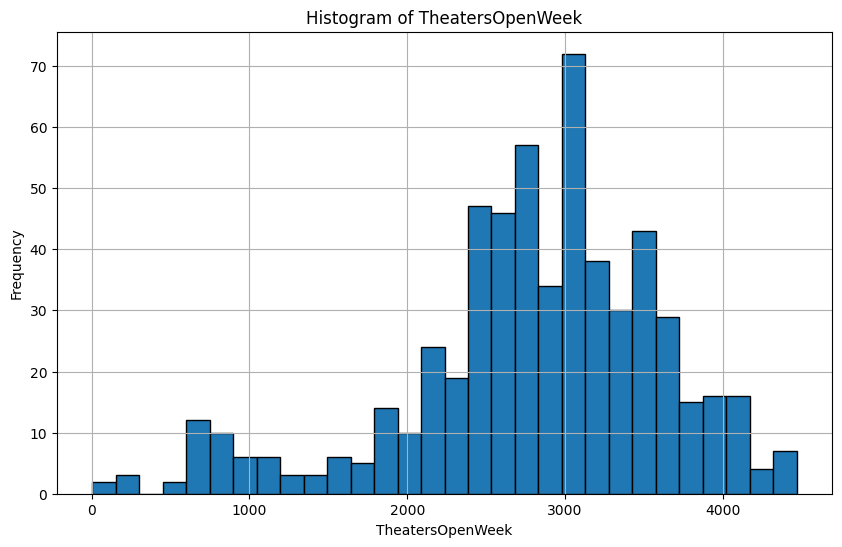

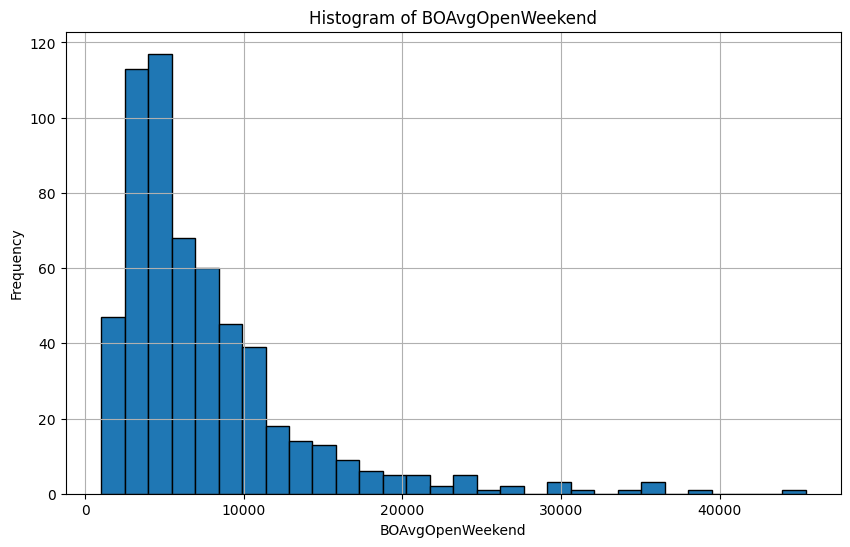

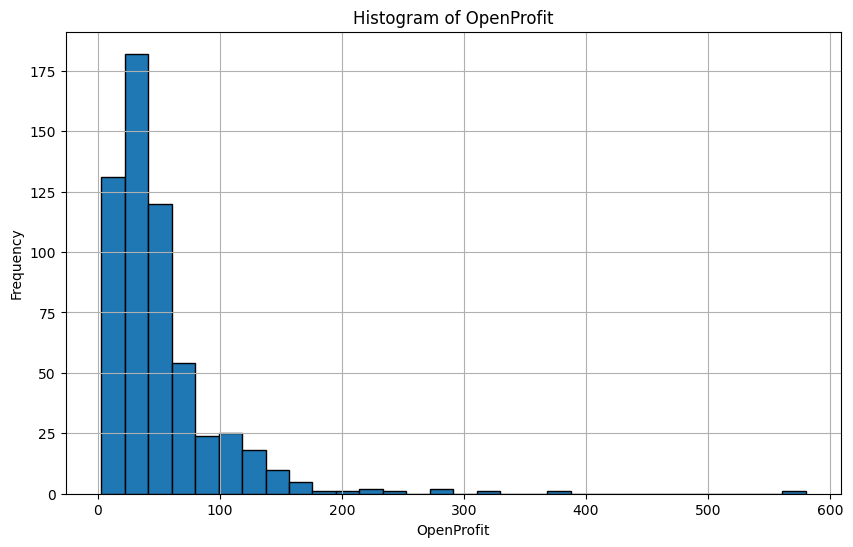

In [59]:
# Plot the histograms
plt.figure(figsize=(10, 6))
plt.hist(data_filtered_reset['TheatersOpenWeek'], bins=30, edgecolor='black')
plt.title('Histogram of TheatersOpenWeek')
plt.xlabel('TheatersOpenWeek')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(data_filtered_reset['BOAvgOpenWeekend'], bins=30, edgecolor='black')
plt.title('Histogram of BOAvgOpenWeekend')
plt.xlabel('BOAvgOpenWeekend')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(data_filtered_reset['OpenProfit'], bins=30, edgecolor='black')
plt.title('Histogram of OpenProfit')
plt.xlabel('OpenProfit')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [67]:
# Compute skewness using pandas
pandas_skewness = data_filtered_reset['OpenProfit'].skew()
print(f"Skewness using pandas: {pandas_skewness}")

#Compute skewness using scipy
from scipy.stats import skew
scipy_skewness = skew(data_filtered_reset['OpenProfit'])
print(f"Skewness using scipy.stats: {scipy_skewness}")

Skewness using pandas: 4.179476010675309
Skewness using scipy.stats: 4.1686405512588465


In [68]:
# Assuming df is your DataFrame
# Drop columns with dtype 'object'
df_filtered = data_filtered_reset.select_dtypes(exclude=['object'])

print(df_filtered)

     RottenTomatoes  AudienceScore  TheatersOpenWeek  OpeningWeekend  \
0              61.0           54.0            4252.0          151.10   
1              42.0           57.0            4122.0          121.60   
2              57.0           89.0            4011.0           70.50   
3              45.0           74.0            4362.0          114.70   
4              78.0           82.0            4285.0           77.10   
..              ...            ...               ...             ...   
574            24.0           50.0            3002.0            5.42   
575            91.0           79.0            2405.0            7.86   
576            87.0           88.0            3641.0           55.10   
577            26.0           36.0            2769.0            9.36   
578            14.0           42.0            3482.0           20.07   

     BOAvgOpenWeekend  DomesticGross  ForeignGross  WorldGross  Budget  \
0             35540.0         336.53        554.34      890.8

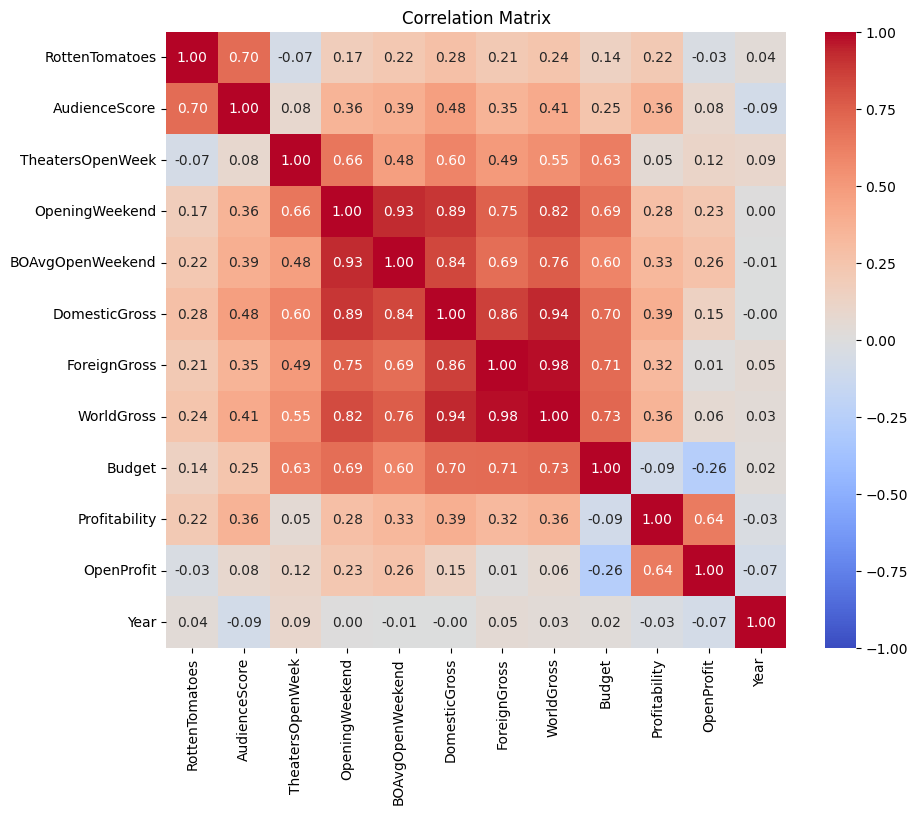

In [69]:
# Calculate the correlation matrix
corr_matrix = df_filtered.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)

# Title for the heatmap
plt.title('Correlation Matrix')

# Show the plot
plt.show()

Frequency Distribution of 'Category':
 LeadStudio
Independent                 112
Warner Bros                  81
Fox                          62
Paramount                    59
Sony                         57
Universal                    56
Disney                       37
Lionsgate                    26
Summit                       19
Relativity Media             18
Weinstein                    17
DreamWorks                    6
MGM                           5
CBS                           4
Miramax                       4
Focus                         4
Buena Vista                   4
Columbia                      3
Happy Madison                 3
Spyglass Entertainment        3
New Line                      2
Liberty Starz                 2
Legendary Pictures            2
Aardman Animations            1
Pixar                         1
Vertigo                       1
Highlight Communications      1
Mediaplex                     1
Village Roadshow              1
Regency Enterprises   

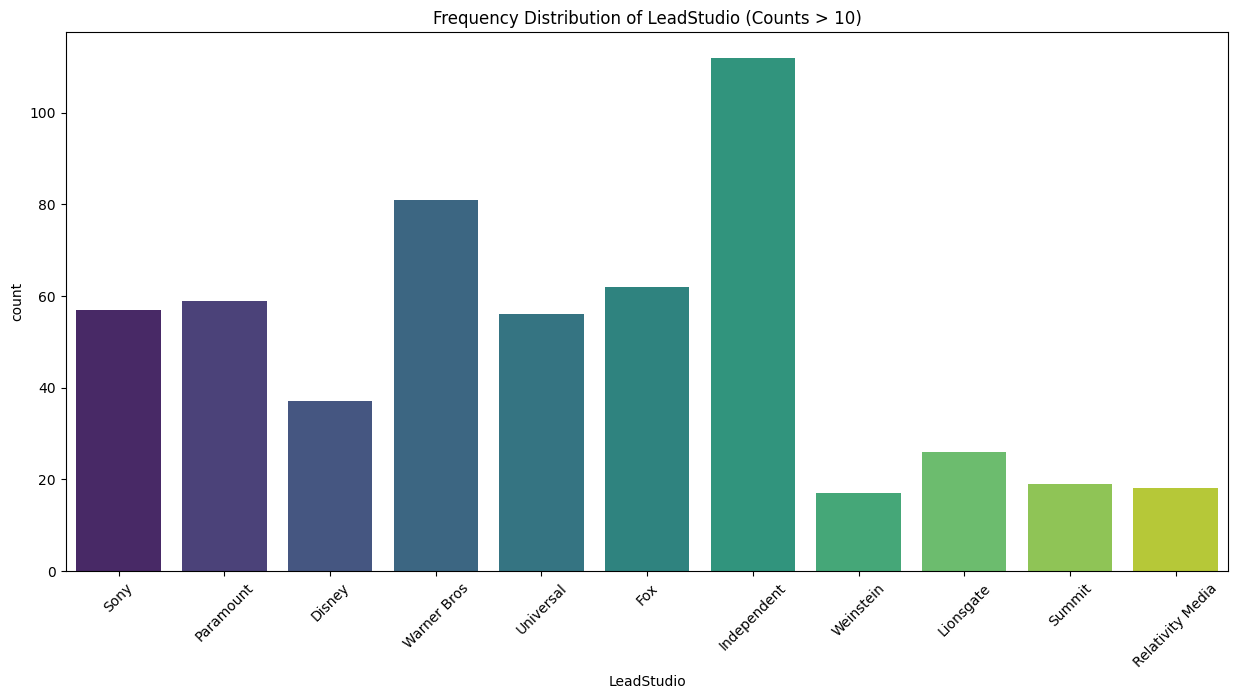

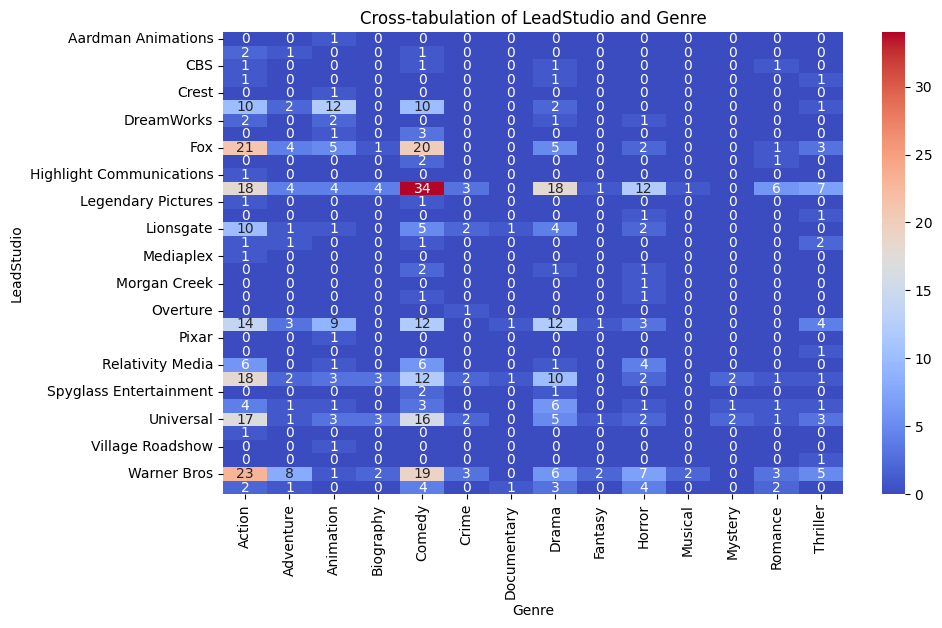

In [16]:
# Non numerical columns plots
# 1. Frequency Distribution
category_counts = data['LeadStudio'].value_counts()
print("Frequency Distribution of 'Category':\n", category_counts)

# 4. Cross-tabulations
cross_tab = pd.crosstab(data['LeadStudio'], data['Genre'])
print("\nCross-tabulation of 'LeadStudio' and 'Genre':\n", cross_tab)

# Visualization

# Calculate the count of each unique value in 'LeadStudio'
leadstudio_counts = data['LeadStudio'].value_counts()

# Filter values with count greater than 10
filtered_studios = leadstudio_counts[leadstudio_counts > 10].index

# Filter the DataFrame based on these values
filtered_data = data[data['LeadStudio'].isin(filtered_studios)]

# Create the count plot for the filtered data
plt.figure(figsize=(15, 7))
sns.countplot(x='LeadStudio', data=filtered_data, hue='LeadStudio', palette='viridis', legend=False)
plt.title('Frequency Distribution of LeadStudio (Counts > 10)')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

# Cross-tabulation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='d')
plt.title('Cross-tabulation of LeadStudio and Genre')
plt.show()